# Investor AI Project: Initial Data Analysis and Stock Screening

### Introduction

With raw financial data from [Simfin](https://www.simfin.com), this notebook details the process involved in transforming data into meaningful insights by performing data cleaning, initial analysis, and stock screening. The ultimate goal is to develop a framework that identifies value stock , as well as, stable, defensive stock picks that would be needed during economic uncertainty.

By walking through the financial health of companies from 2021 using key metrics like market capitalization, price-to-earnings ratios, gross profit margins, and operating margins, this notebook aims to simplify the decision-making process for determining which stocks show long-term potential.

The final output will be 4 structured datasets (annual income, company information, stock prices and industry) and creating dataframes to make it easier to perform data visualizations within Tableau, in order to allow for deeper, intuitive exploration of the best investment opportunities. This notebook also lays the groundwork for building an AI-driven stock investor tool. 

---

### Table of Contents:
- [Import data](#import-data)
- Perform [Data Cleanup](#data-cleaning) & [Initial Analysis](#initial-analysis)
- Look the [Basic Stock Statistics](#stock-statistics)
- Create a rudimentary [Stock Screener](#stock-screener)
- [Export cleaned dataframes](#export-dataframes)
- [Conclusion](#conclusion)

## Import data

[Back to top](#table-of-contents)

Import libraries and convert the csv to a pandas dataframe

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime


Bring in annual income data. 

In [226]:
income_data = pd.read_csv('us-income-annual.csv', delimiter=';')

Bring in share price data. 

In [227]:
# Define the required columns for the data
required_cols = ['Ticker', 'Date', 'Open','High', 'Low', 'Close', 'Adj. Close', 'Volume', 'Dividend', 'Shares Outstanding']

stock_prices = pd.read_csv('us-shareprices-daily.csv', delimiter=';', usecols=required_cols)

Bring in companies data. 

In [228]:
companies = pd.read_csv('us-companies.csv', delimiter=';')

Bring in industries data. 

In [229]:
industryId_dt_setup = {
    'IndustryId':'int64'
}

In [230]:
industries = pd.read_csv('industries.csv', delimiter=';', dtype=industryId_dt_setup)

## Data Cleaning

[Back to top](#table-of-contents)

Go through the datasets to make sure the data doesn't have duplicates, review missing data and look at datatypes: 

- [Annual Income](#annual-income)

- [Stock Prices](#stock-prices)

- [Industries](#industries)

- [Company info](#company-data)


##### Duplicates Check

[Back to Data Cleaning](#data-cleaning)

Determine if there are duplicates in the dataframes:

In [231]:
def find_duplicates(dataframe):
    return dataframe[dataframe.duplicated()] 

print(find_duplicates(income_data))
print(find_duplicates(stock_prices))
print(find_duplicates(companies))

Empty DataFrame
Columns: [Ticker, SimFinId, Currency, Fiscal Year, Fiscal Period, Report Date, Publish Date, Restated Date, Shares (Basic), Shares (Diluted), Revenue, Cost of Revenue, Gross Profit, Operating Expenses, Selling, General & Administrative, Research & Development, Depreciation & Amortization, Operating Income (Loss), Non-Operating Income (Loss), Interest Expense, Net, Pretax Income (Loss), Adj., Abnormal Gains (Losses), Pretax Income (Loss), Income Tax (Expense) Benefit, Net, Income (Loss) from Continuing Operations, Net Extraordinary Gains (Losses), Net Income, Net Income (Common)]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [Ticker, Date, Open, High, Low, Close, Adj. Close, Volume, Dividend, Shares Outstanding]
Index: []
Empty DataFrame
Columns: [Ticker, SimFinId, Company Name, IndustryId, ISIN, End of financial year (month), Number Employees, Business Summary, Market, CIK, Main Currency]
Index: []


No duplicates exist in any of the dataframes.

##### Annual Income

In [232]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ticker                                    17728 non-null  object 
 1   SimFinId                                  17728 non-null  int64  
 2   Currency                                  17728 non-null  object 
 3   Fiscal Year                               17728 non-null  int64  
 4   Fiscal Period                             17728 non-null  object 
 5   Report Date                               17728 non-null  object 
 6   Publish Date                              17728 non-null  object 
 7   Restated Date                             17728 non-null  object 
 8   Shares (Basic)                            17616 non-null  float64
 9   Shares (Diluted)                          17452 non-null  float64
 10  Revenue                           

In [233]:
income_data.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2018,FY,2018-10-31,2018-12-20,2020-12-18,321000000.0,325000000.0,...,42000000.0,-37000000.0,946000000,NaN,9.460000e+08,-630000000.0,316000000,NaN,316000000,316000000
1,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,919000000,NaN,9.190000e+08,152000000.0,1071000000,NaN,1071000000,1071000000
2,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,309000000.0,312000000.0,...,-4000000.0,-70000000.0,842000000,NaN,8.420000e+08,-123000000.0,719000000,NaN,719000000,719000000
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,305000000.0,307000000.0,...,13000000.0,-79000000.0,1360000000,NaN,1.360000e+09,-150000000.0,1210000000,NaN,1210000000,1210000000
4,A,45846,USD,2022,FY,2022-10-31,2022-12-21,2023-12-20,304000000.0,307000000.0,...,-114000000.0,-75000000.0,1504000000,NaN,1.504000e+09,-250000000.0,1254000000,NaN,1254000000,1254000000


The annual income data is from 2018 - 2022.

In [234]:
# get the DataFrame shape 
print('DataFrame shape is: ',income_data.shape)
#Have a look at what the DataFrame looks like
income_data

DataFrame shape is:  (17728, 28)


,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2018,FY,2018-10-31,2018-12-20,2020-12-18,321000000.0,325000000.0,...,42000000.0,-37000000.0,946000000,NaN,9.460000e+08,-630000000.0,316000000,NaN,316000000,316000000
1,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,919000000,NaN,9.190000e+08,152000000.0,1071000000,NaN,1071000000,1071000000
2,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,309000000.0,312000000.0,...,-4000000.0,-70000000.0,842000000,NaN,8.420000e+08,-123000000.0,719000000,NaN,719000000,719000000
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,305000000.0,307000000.0,...,13000000.0,-79000000.0,1360000000,NaN,1.360000e+09,-150000000.0,1210000000,NaN,1210000000,1210000000
4,A,45846,USD,2022,FY,2022-10-31,2022-12-21,2023-12-20,304000000.0,307000000.0,...,-114000000.0,-75000000.0,1504000000,NaN,1.504000e+09,-250000000.0,1254000000,NaN,1254000000,1254000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,ZYXI,171401,USD,2018,FY,2018-12-31,2019-02-26,2019-02-26,35753300.0,37447300.0,...,-154000.0,-154000.0,10216000,NaN,1.021600e+07,-664000.0,9552000,NaN,9552000,9552000
17724,ZYXI,171401,USD,2019,FY,2019-12-31,2020-02-27,2021-02-25,35682900.0,37359300.0,...,-5000.0,-5000.0,11945536,880000.0,1.194100e+07,-2449000.0,9492000,NaN,9492000,9492000
17725,ZYXI,171401,USD,2020,FY,2020-12-31,2021-02-25,2022-03-22,37255900.0,38437300.0,...,-19000.0,-19000.0,10230000,-77000.0,1.015300e+07,-1079000.0,9074000,NaN,9074000,9074000
17726,ZYXI,171401,USD,2021,FY,2021-12-31,2022-03-22,2023-03-14,37255900.0,38437300.0,...,-95000.0,-95000.0,22271000,NaN,2.227100e+07,-5168000.0,17103000,NaN,17103000,17103000


In [235]:
# Check for missing values
income_data.isnull().sum()

Ticker                                          0
SimFinId                                        0
Currency                                        0
Fiscal Year                                     0
Fiscal Period                                   0
Report Date                                     0
Publish Date                                    0
Restated Date                                   0
Shares (Basic)                                112
Shares (Diluted)                              276
Revenue                                      1676
Cost of Revenue                              3041
Gross Profit                                 3012
Operating Expenses                             17
Selling, General & Administrative             549
Research & Development                       9584
Depreciation & Amortization                 10453
Operating Income (Loss)                         0
Non-Operating Income (Loss)                   273
Interest Expense, Net                        1405


In [236]:
# Fill missing values if necessary
income_data.fillna(0, inplace=True)

In [237]:
income_data.isnull().sum()

Ticker                                      0
SimFinId                                    0
Currency                                    0
Fiscal Year                                 0
Fiscal Period                               0
Report Date                                 0
Publish Date                                0
Restated Date                               0
Shares (Basic)                              0
Shares (Diluted)                            0
Revenue                                     0
Cost of Revenue                             0
Gross Profit                                0
Operating Expenses                          0
Selling, General & Administrative           0
Research & Development                      0
Depreciation & Amortization                 0
Operating Income (Loss)                     0
Non-Operating Income (Loss)                 0
Interest Expense, Net                       0
Pretax Income (Loss), Adj.                  0
Abnormal Gains (Losses)           

##### Stock prices

[Back to Data Cleaning](#data-cleaning)

Using stock data that was previous cleaned [see this notebook](https://github.com/shanirivers/Data-Science-Projects/blob/main/notebooks/Self-Directed%20Projects/Stock_Data_Cleanup.ipynb), I just double-checked that the data was still good to go.

In [238]:
stock_prices.head()

,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,2018-08-07,66.83,67.94,66.63,67.66,64.78,2829039,NaN,319000000.0
1,A,2018-08-08,67.74,68.15,67.34,67.38,64.51,1682000,NaN,319000000.0
2,A,2018-08-09,67.48,67.62,66.61,66.69,63.85,1727776,NaN,319000000.0
3,A,2018-08-10,66.82,66.87,65.93,66.26,63.44,2166251,NaN,319000000.0
4,A,2018-08-13,66.44,66.99,65.67,65.94,63.13,2989306,NaN,319000000.0


In [239]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322568 entries, 0 to 5322567
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ticker              object 
 1   Date                object 
 2   Open                float64
 3   High                float64
 4   Low                 float64
 5   Close               float64
 6   Adj. Close          float64
 7   Volume              int64  
 8   Dividend            float64
 9   Shares Outstanding  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 406.1+ MB


In [240]:
# get the DataFrame shape 
print('DataFrame shape is: ',stock_prices.shape)

stock_prices

DataFrame shape is:  (5322568, 10)


,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,2018-08-07,66.83,67.94,66.63,67.66,64.78,2829039,NaN,319000000.0
1,A,2018-08-08,67.74,68.15,67.34,67.38,64.51,1682000,NaN,319000000.0
2,A,2018-08-09,67.48,67.62,66.61,66.69,63.85,1727776,NaN,319000000.0
3,A,2018-08-10,66.82,66.87,65.93,66.26,63.44,2166251,NaN,319000000.0
4,A,2018-08-13,66.44,66.99,65.67,65.94,63.13,2989306,NaN,319000000.0
...,...,...,...,...,...,...,...,...,...,...
5322563,ZYXI,2023-07-05,9.50,9.54,9.15,9.17,9.17,215455,NaN,36435000.0
5322564,ZYXI,2023-07-06,9.02,9.18,8.93,9.01,9.01,191404,NaN,36435000.0
5322565,ZYXI,2023-07-07,9.03,9.29,8.94,9.00,9.00,291326,NaN,36435000.0
5322566,ZYXI,2023-07-10,9.00,9.23,8.99,9.18,9.18,148425,NaN,36435000.0


##### Industries

[Back to Data Cleaning](#data-cleaning)

Look at industries dataframe. Will need to create a new classification for companies in the annual income dataframe that don't have an `IndustryId`. 

In [241]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IndustryId  74 non-null     int64 
 1   Industry    74 non-null     object
 2   Sector      74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [242]:
industries.describe()

,IndustryId
count,74.000000
mean,104329.797297
std,3293.071327
min,100001.000000
25%,102001.250000
50%,104002.500000
75%,107002.750000
max,111001.000000


In [243]:
industries.head()

,IndustryId,Industry,Sector
0,100001,Industrial Products,Industrials
1,100002,Business Services,Industrials
2,100003,Engineering & Construction,Industrials
3,100004,Waste Management,Industrials
4,100005,Industrial Distribution,Industrials


Create a new category for companies that do not have a IndustryId:

In [244]:
new_record = pd.DataFrame([{'IndustryId': 999999, 'Industry': 'Not Available', 'Sector': 'Unknown'}])

industries = pd.concat([industries, new_record], ignore_index=True)
industries.reset_index()

,index,IndustryId,Industry,Sector
0,0,100001,Industrial Products,Industrials
1,1,100002,Business Services,Industrials
2,2,100003,Engineering & Construction,Industrials
3,3,100004,Waste Management,Industrials
4,4,100005,Industrial Distribution,Industrials
...,...,...,...,...
70,70,110005,Building Materials,Basic Materials
71,71,110006,Coal,Basic Materials
72,72,110007,Steel,Basic Materials
73,73,111001,Diversified Holdings,Other


##### Company Data

[Back to Data Cleaning](#data-cleaning)

In [245]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         5559 non-null   object 
 1   SimFinId                       5585 non-null   int64  
 2   Company Name                   5561 non-null   object 
 3   IndustryId                     5364 non-null   float64
 4   ISIN                           4718 non-null   object 
 5   End of financial year (month)  5562 non-null   float64
 6   Number Employees               4969 non-null   float64
 7   Business Summary               5328 non-null   object 
 8   Market                         5585 non-null   object 
 9   CIK                            5573 non-null   float64
 10  Main Currency                  5585 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 480.1+ KB


`IndustryId` came in as a float instead of an integer and there are a few null values in the column as well. 

In [246]:
companies.head()

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,16038779,"BurgerFi International, Inc.",NaN,NaN,12.0,NaN,NaN,us,1723580.0,USD
1,NaN,15883534,NaN,NaN,NaN,NaN,NaN,NaN,us,1713445.0,USD
2,NaN,15673228,"Atlanta Braves Holdings, Inc.",NaN,NaN,12.0,NaN,NaN,us,1958140.0,USD
3,NaN,15585644,NaN,NaN,NaN,NaN,NaN,NaN,us,1823587.0,USD
4,NaN,14159407,NaN,NaN,NaN,NaN,NaN,NaN,us,1823529.0,USD


In [247]:
# get the DataFrame shape 
print('DataFrame shape is: ',companies.shape)
#Have a look at what the DataFrame looks like
companies

DataFrame shape is:  (5585, 11)


,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,16038779,"BurgerFi International, Inc.",NaN,NaN,12.0,NaN,NaN,us,1723580.0,USD
1,NaN,15883534,NaN,NaN,NaN,NaN,NaN,NaN,us,1713445.0,USD
2,NaN,15673228,"Atlanta Braves Holdings, Inc.",NaN,NaN,12.0,NaN,NaN,us,1958140.0,USD
3,NaN,15585644,NaN,NaN,NaN,NaN,NaN,NaN,us,1823587.0,USD
4,NaN,14159407,NaN,NaN,NaN,NaN,NaN,NaN,us,1823529.0,USD
...,...,...,...,...,...,...,...,...,...,...,...
5580,ZVO,901866,Zovio Inc,102006.0,US98979V1026,12.0,1528.0,Bridgepoint Education Inc is an education serv...,us,1305323.0,USD
5581,ZVSA,15464897,"ZyVersa Therapeutics, Inc.",106002.0,NaN,12.0,7.0,"ZyVersa Therapeutics, Inc., a clinical stage b...",us,1859007.0,USD
5582,ZY,1243193,Zymergen Inc.,106002.0,US98985X1000,12.0,758.0,Zymergen is a biofacturing company using biolo...,us,1645842.0,USD
5583,ZYNE,901704,"Zynerba Pharmaceuticals, Inc.",106002.0,US98986X1090,12.0,25.0,Zynerba Pharmaceuticals Inc together with its ...,us,1621443.0,USD


Make all the company names are the same case and change the IndustryID to integer datatype:

In [248]:
companies['Company Name'] = companies['Company Name'].str.upper()

In [249]:
companies

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,16038779,"BURGERFI INTERNATIONAL, INC.",NaN,NaN,12.0,NaN,NaN,us,1723580.0,USD
1,NaN,15883534,NaN,NaN,NaN,NaN,NaN,NaN,us,1713445.0,USD
2,NaN,15673228,"ATLANTA BRAVES HOLDINGS, INC.",NaN,NaN,12.0,NaN,NaN,us,1958140.0,USD
3,NaN,15585644,NaN,NaN,NaN,NaN,NaN,NaN,us,1823587.0,USD
4,NaN,14159407,NaN,NaN,NaN,NaN,NaN,NaN,us,1823529.0,USD
...,...,...,...,...,...,...,...,...,...,...,...
5580,ZVO,901866,ZOVIO INC,102006.0,US98979V1026,12.0,1528.0,Bridgepoint Education Inc is an education serv...,us,1305323.0,USD
5581,ZVSA,15464897,"ZYVERSA THERAPEUTICS, INC.",106002.0,NaN,12.0,7.0,"ZyVersa Therapeutics, Inc., a clinical stage b...",us,1859007.0,USD
5582,ZY,1243193,ZYMERGEN INC.,106002.0,US98985X1000,12.0,758.0,Zymergen is a biofacturing company using biolo...,us,1645842.0,USD
5583,ZYNE,901704,"ZYNERBA PHARMACEUTICALS, INC.",106002.0,US98986X1090,12.0,25.0,Zynerba Pharmaceuticals Inc together with its ...,us,1621443.0,USD


Remove nulls from ticker column in the company dataframe, as the ticker will be used to link to that other dataframes. 

In [250]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         5559 non-null   object 
 1   SimFinId                       5585 non-null   int64  
 2   Company Name                   5561 non-null   object 
 3   IndustryId                     5364 non-null   float64
 4   ISIN                           4718 non-null   object 
 5   End of financial year (month)  5562 non-null   float64
 6   Number Employees               4969 non-null   float64
 7   Business Summary               5328 non-null   object 
 8   Market                         5585 non-null   object 
 9   CIK                            5573 non-null   float64
 10  Main Currency                  5585 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 480.1+ KB


Drop null values in Ticker column, as the Ticker needs to be able to link other dataframes' data:

In [251]:
companies.isnull().sum()

Ticker                            26
SimFinId                           0
Company Name                      24
IndustryId                       221
ISIN                             867
End of financial year (month)     23
Number Employees                 616
Business Summary                 257
Market                             0
CIK                               12
Main Currency                      0
dtype: int64

In [252]:
companies.dropna(subset=['Ticker'], inplace=True)

In [253]:
companies.isnull().sum()

Ticker                             0
SimFinId                           0
Company Name                       0
IndustryId                       195
ISIN                             841
End of financial year (month)      0
Number Employees                 590
Business Summary                 231
Market                             0
CIK                               11
Main Currency                      0
dtype: int64

Clean up `IndustryId` columns missing values. I will create a new value for companies that don't have an `IndustryId` in the `industries` dataframe.

In [254]:
companies[pd.isnull(companies['IndustryId'])]


,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
27,A21,1333027,LI AUTO INC.,NaN,NaN,12.0,NaN,NaN,us,1791706.0,USD
68,ABX,1271527,BARRICK GOLD CORP,NaN,NaN,12.0,NaN,NaN,us,756894.0,USD
103,ACPW,95192,ACTIVE POWER INC,NaN,NaN,12.0,NaN,NaN,us,1044435.0,USD
167,AFGS,1331220,AGRIFORCE GROWING SYSTEMS LTD.,NaN,NaN,12.0,NaN,NaN,us,1826397.0,USD
173,AG,3307756,FIRST MAJESTIC SILVER CORP,NaN,CA32076V1031,12.0,4000.0,First Majestic Silver Corp. engages in the acq...,us,1308648.0,USD
...,...,...,...,...,...,...,...,...,...,...,...
5465,WTMK,90931,WHITEMARK HOMES INC,NaN,NaN,12.0,NaN,NaN,us,42284.0,USD
5498,XHUA,662912,XINHUA CHINA LTD,NaN,NaN,6.0,NaN,NaN,us,1104904.0,USD
5499,XING,663216,CHINA XINGBANG INDUSTRY GROUP INC.,NaN,NaN,12.0,NaN,NaN,us,1521222.0,USD
5502,XLGROUP,903527,XL GROUP LTD,NaN,NaN,12.0,NaN,NaN,us,875159.0,USD


Assign the 5 companies with missing industryids
companies.

In [255]:
companies['IndustryId'].fillna(999999, inplace=True)

/var/folders/mh/5w9wsttn3q1586zzyj83m0v40000gn/T/ipykernel_2423/1536034804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  companies['IndustryId'].fillna(999999, inplace=True)


In [256]:
companies[pd.isnull(companies['IndustryId'])]

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency


In [257]:
companies['IndustryId'] = companies['IndustryId'].astype('Int64')

In [258]:
companies.head(10)

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
26,A,45846,AGILENT TECHNOLOGIES INC,106001,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD
27,A21,1333027,LI AUTO INC.,999999,NaN,12.0,NaN,NaN,us,1791706.0,USD
28,AA,367153,ALCOA CORP,110004,US0138721065,12.0,12900.0,Alcoa Corp is an integrated aluminum company. ...,us,1675149.0,USD
29,AAC,7962652,ARES ACQUISITION CORPORATION,104002,US0003071083,12.0,NaN,Ares Acquisition Corporation does not have sig...,us,1829432.0,USD
30,AACI,11820349,ARMADA ACQUISITION CORP. I,104002,US04208V1035,9.0,NaN,Armada Acquisition Corp. I focuses on effectin...,us,1844817.0,USD
31,AAC_delisted,939324,"AAC HOLDINGS, INC.",106011,NaN,12.0,1900.0,"AAC Holdings, Inc. engages in the operation re...",us,1606180.0,USD
32,AAGH,12444287,AMERICA GREAT HEALTH,106002,US02365T1016,6.0,7.0,America Great Health operates as a biotechnolo...,us,1098009.0,USD
33,AAIC,9076064,ARLINGTON ASSET INVESTMENT CORP.,109001,US0413562051,12.0,9.0,Arlington Asset Investment Corp. (NYSE: AAIC) ...,us,1209028.0,USD
34,AAL,68568,AMERICAN AIRLINES GROUP INC.,100006,US02376R1023,12.0,2018.0,"American Airlines Group Inc operates over 6,00...",us,6201.0,USD
35,AAMC,847094,ALTISOURCE ASSET MANAGEMENT CORP,104001,VI02153X1080,12.0,103.0,Altisource Asset Management Corp is an asset m...,us,1555074.0,USD


## Initial Analysis

[Back to top](#table-of-contents)

In [259]:
print('Income data size is: ', income_data.shape)
print('stock_prices data size is: ', stock_prices.shape)
print('companies data size is: ', companies.shape)

Income data size is:  (17728, 28)
stock_prices data size is:  (5322568, 10)
companies data size is:  (5559, 11)


In [260]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ticker                                    17728 non-null  object 
 1   SimFinId                                  17728 non-null  int64  
 2   Currency                                  17728 non-null  object 
 3   Fiscal Year                               17728 non-null  int64  
 4   Fiscal Period                             17728 non-null  object 
 5   Report Date                               17728 non-null  object 
 6   Publish Date                              17728 non-null  object 
 7   Restated Date                             17728 non-null  object 
 8   Shares (Basic)                            17728 non-null  float64
 9   Shares (Diluted)                          17728 non-null  float64
 10  Revenue                           

In [261]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322568 entries, 0 to 5322567
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ticker              object 
 1   Date                object 
 2   Open                float64
 3   High                float64
 4   Low                 float64
 5   Close               float64
 6   Adj. Close          float64
 7   Volume              int64  
 8   Dividend            float64
 9   Shares Outstanding  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 406.1+ MB


In [262]:
income_data.describe()

,SimFinId,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
count,1.772800e+04,17728.000000,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,...,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04
mean,4.337688e+06,2020.144856,1.926397e+09,8.707868e+10,4.850088e+09,-3.268800e+09,1.558878e+09,-1.066911e+09,-6.794352e+08,-3.540203e+08,...,-5.657599e+08,-8.694150e+07,4.374816e+08,-3.042939e+08,1.878499e+09,-8.971423e+07,3.396900e+08,9.400419e+06,3.359487e+08,3.277408e+08
std,5.100852e+06,1.405130,2.159859e+11,8.016714e+12,2.176807e+10,1.673329e+10,6.665947e+09,4.228307e+09,3.088504e+09,2.773524e+10,...,6.185564e+10,4.121150e+08,3.373685e+09,3.563202e+10,1.815469e+11,6.612476e+08,2.872012e+09,2.920494e+08,2.855025e+09,2.842852e+09
min,1.800000e+01,2018.000000,0.000000e+00,0.000000e+00,-1.988063e+09,-4.637210e+11,-7.604696e+09,-1.271400e+11,-1.271400e+11,-3.687609e+12,...,-8.220144e+12,-1.978945e+10,-5.257498e+10,-4.729374e+12,-1.267413e+12,-2.224200e+10,-5.291065e+10,-1.732400e+10,-5.304757e+10,-5.304822e+10
25%,4.467298e+05,2019.000000,1.888255e+07,1.894359e+07,4.158825e+07,-1.351517e+09,5.411000e+06,-6.020136e+08,-3.640089e+08,-3.315325e+07,...,-4.620500e+07,-5.330000e+07,-3.587062e+07,-1.178182e+07,-3.902400e+07,-2.761300e+07,-3.892475e+07,0.000000e+00,-3.861950e+07,-3.985075e+07
50%,1.014359e+06,2020.000000,4.810000e+07,4.869438e+07,4.687979e+08,-1.964975e+08,1.702920e+08,-1.720778e+08,-8.860200e+07,0.000000e+00,...,-4.025000e+06,-5.256578e+06,3.035500e+06,0.000000e+00,2.652000e+06,-6.070000e+05,1.986150e+06,0.000000e+00,1.926500e+06,1.289000e+06
75%,9.076203e+06,2021.000000,1.263374e+08,1.289550e+08,2.368015e+09,-7.992764e+06,8.356648e+08,-4.469750e+07,-1.873975e+07,0.000000e+00,...,1.100000e+05,0.000000e+00,1.720115e+08,0.000000e+00,1.701125e+08,0.000000e+00,1.397200e+08,0.000000e+00,1.350190e+08,1.326625e+08
max,1.764404e+07,2023.000000,2.874500e+13,7.590000e+14,6.112890e+11,4.205710e+08,1.707820e+11,2.604623e+09,1.981122e+09,1.190660e+08,...,9.408625e+10,1.740072e+10,1.191030e+11,2.809990e+11,2.398165e+13,8.502000e+09,9.980300e+10,2.126034e+10,9.980300e+10,9.980300e+10


In [263]:
stock_prices.describe()

,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
count,5.322568e+06,5.322568e+06,5.322568e+06,5.322568e+06,5.322568e+06,5.322568e+06,34181.000000,4.942387e+06
mean,5.433237e+02,5.623159e+02,5.113188e+02,5.358395e+02,5.238236e+02,1.830268e+06,0.400000,2.605399e+08
std,4.523143e+04,4.701113e+04,4.163717e+04,4.443638e+04,4.441018e+04,3.020171e+07,0.902603,5.489286e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,8.880000e+00,9.110000e+00,8.620000e+00,8.860000e+00,8.320000e+00,4.278800e+04,0.120000,1.893059e+07
50%,2.210000e+01,2.255000e+01,2.164000e+01,2.208000e+01,2.053000e+01,2.607890e+05,0.240000,4.901730e+07
75%,5.401000e+01,5.499000e+01,5.303000e+01,5.400000e+01,5.090000e+01,9.622085e+05,0.450000,1.283296e+08
max,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.848998e+10,68.060000,1.121052e+12


In [264]:
companies.describe()

,SimFinId,IndustryId,End of financial year (month),Number Employees,CIK
count,5.559000e+03,5559.0,5559.000000,4.969000e+03,5.548000e+03
mean,5.095930e+06,135481.465551,10.816874,7.156182e+03,1.217888e+06
std,5.420557e+06,164872.058071,2.832482,3.189401e+04,5.279187e+05
min,1.800000e+01,100001.0,1.000000,0.000000e+00,1.750000e+03
25%,5.335970e+05,101005.0,12.000000,1.540000e+02,8.995868e+05
50%,1.234798e+06,104002.0,12.000000,9.550000e+02,1.349436e+06
75%,1.065664e+07,106004.0,12.000000,3.665000e+03,1.636237e+06
max,1.607609e+07,999999.0,12.000000,1.298000e+06,1.999480e+06


In [265]:
# To see what all the columns are in our dataframe, use the .keys() function. 
print(income_data.keys())

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')


In [266]:
print(stock_prices.keys())

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj. Close',
       'Volume', 'Dividend', 'Shares Outstanding'],
      dtype='object')


In [267]:
print(companies.keys())

Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId', 'ISIN',
       'End of financial year (month)', 'Number Employees', 'Business Summary',
       'Market', 'CIK', 'Main Currency'],
      dtype='object')


## Stock Statistics

[Back to top](#table-of-contents)

Rudimentary stock screening and analysis for 2021. 

In [268]:
income_data[income_data['Fiscal Year'] == 2021]

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,13000000.0,-79000000.0,1360000000,0.000000e+00,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,250000000.0,-195000000.0,1201628671,-1.128000e+09,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000
12,AAC,7962652,USD,2021,FY,2021-12-31,2022-03-04,2023-03-10,1.250000e+08,1.250000e+08,...,284779.0,0.0,-6176837,2.202591e+07,1.584907e+07,0.0,15849072,0.0,15849072,15849072
14,AACI,11820349,USD,2021,FY,2021-09-30,2021-12-29,2022-12-22,5.709500e+06,2.070950e+07,...,1052.0,1052.0,-183053,0.000000e+00,-1.830530e+05,0.0,-183053,-285846.0,-468899,-468899
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-20044.0,-20044.0,-263604,-5.450000e+03,-2.690540e+05,0.0,-269054,0.0,-269054,-269054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17713,ZVO,901866,USD,2021,FY,2021-12-31,2022-04-15,2022-04-15,3.195900e+07,3.195900e+07,...,130000.0,0.0,-39837000,-2.641000e+06,-4.247800e+07,129000.0,-42349000,0.0,-42349000,-42349000
17714,ZVSA,15464897,USD,2021,FY,2021-12-31,2022-03-31,2023-03-31,6.911800e+04,6.911800e+04,...,-821366.0,-821366.0,-8102052,4.415810e+05,-8.084161e+06,0.0,-8084161,0.0,-8084161,-8084161
17717,ZY,1243193,USD,2021,FY,2021-12-31,2022-03-30,2022-03-30,9.794090e+07,9.794090e+07,...,-16020000.0,-14641000.0,-334775000,-2.695900e+07,-3.617340e+08,-51000.0,-361785000,0.0,-361785000,-361785000
17721,ZYNE,901704,USD,2021,FY,2021-12-31,2022-03-01,2023-03-28,4.009213e+07,4.009213e+07,...,-538634.0,21047.0,-37309024,0.000000e+00,-3.730902e+07,0.0,-37309024,0.0,-37309024,-37309024


In [269]:
income_data[income_data['Fiscal Year'] == 2022].sort_values(by=['Net Income'])

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
3168,CEMI,1253180,USD,2022,FY,2022-12-31,2023-03-29,2023-03-29,3.227466e+07,3.227466e+07,...,3.817950e+08,-2.812772e+09,-20020066000,-3.236186e+09,-2.325625e+10,-3.440500e+07,-23290657000,0.000000e+00,-23290657000,-23290657000
2606,BRK-A,71306,USD,2022,FY,2022-12-31,2023-02-27,2024-02-26,1.470577e+06,1.470577e+06,...,-2.489000e+09,-4.352000e+09,-30500000000,0.000000e+00,-3.050000e+10,8.502000e+09,-21998000000,0.000000e+00,-22759000000,-22759000000
6042,FIS,88558,USD,2022,FY,2022-12-31,2023-02-27,2024-02-26,6.040000e+08,6.040000e+08,...,-2.770000e+08,-2.755698e+08,-16302773541,-1.030000e+08,9.410000e+08,-3.769636e+08,-16671445876,-1.732400e+10,-16720000000,-16720000000
15323,TDOC,963383,USD,2022,FY,2022-12-31,2023-03-01,2024-02-23,1.614571e+08,1.614571e+08,...,-1.012900e+07,-9.270000e+06,-13651293326,-1.342585e+10,-1.366334e+10,3.812000e+06,-13659531000,0.000000e+00,-13659531000,-13659531000
3237,CFVI,11794976,USD,2022,FY,2022-12-31,2023-03-30,2023-03-30,3.820000e+07,3.820000e+07,...,1.903400e+09,1.903400e+09,-32629922000,2.101050e+10,-1.161942e+10,2.154280e+08,-11403994000,0.000000e+00,-11403994000,-11403994000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,CVX,248396,USD,2022,FY,2022-12-31,2023-02-23,2024-02-26,1.931000e+09,1.940000e+09,...,1.001900e+10,-5.160000e+08,49969000000,-2.950000e+08,4.967400e+10,-1.406600e+10,35608000000,0.000000e+00,35465000000,35465000000
17460,XOM,121214,USD,2022,FY,2022-12-31,2023-02-22,2024-02-28,4.274286e+09,4.274286e+09,...,-1.725400e+10,-7.980000e+08,77753000000,0.000000e+00,7.775300e+10,-2.017600e+10,57577000000,0.000000e+00,55740000000,55740000000
6884,GOOG,18,USD,2022,FY,2022-12-31,2023-02-03,2024-01-31,1.335299e+10,1.355347e+10,...,-3.514000e+09,1.816952e+09,71328000000,0.000000e+00,7.132800e+10,-1.135600e+10,59972000000,0.000000e+00,59972000000,59972000000
10457,MSFT,59265,USD,2022,FY,2022-06-30,2022-07-28,2024-07-30,7.496000e+09,7.540000e+09,...,3.330000e+08,3.102686e+07,83716000000,0.000000e+00,8.371600e+10,-1.097800e+10,72738000000,0.000000e+00,72738000000,72738000000


It appears that Apple (AAPL) and Microsoft (MSFT) earned the most money in 2022, over than $70 billion!

Plot the distribution of net income for all american companies:

<Axes: >

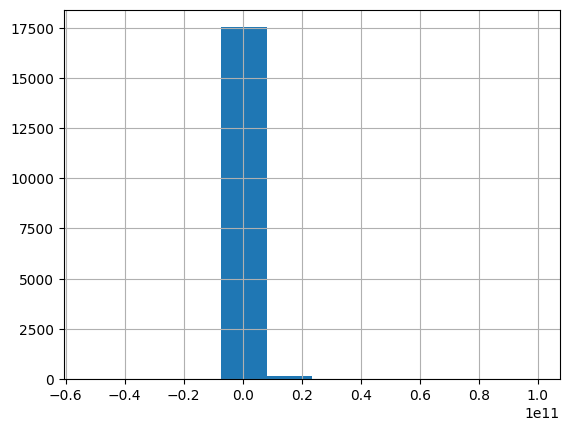

In [270]:
# Lets plot the distribution of net income for all American companies:
income_data['Net Income'].hist()

Plot graph with just 2022 FY data, logarithmic Y axis and more bins for greater resolution.

Max value is:  99803000000


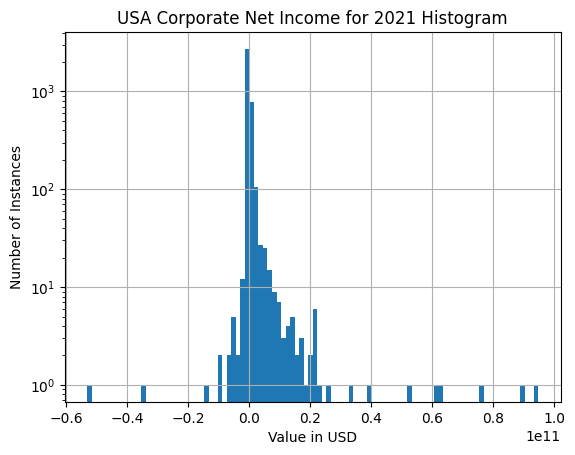

In [271]:
income_data[income_data['Fiscal Year'] == 2021]['Net Income'].hist(bins=100, log=True)
plt.title('USA Corporate Net Income for 2021 Histogram')
plt.xlabel('Value in USD')
plt.ylabel('Number of Instances')
print(f'Max value is: ', income_data[income_data['Fiscal Year'] == 2022]['Net Income'].max())

In [272]:
income_data_2021 = income_data[income_data['Fiscal Year'] == 2021]

In [273]:
income_data_2021.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,13000000.0,-79000000.0,1360000000,0.000000e+00,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,250000000.0,-195000000.0,1201628671,-1.128000e+09,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000
12,AAC,7962652,USD,2021,FY,2021-12-31,2022-03-04,2023-03-10,1.250000e+08,1.250000e+08,...,284779.0,0.0,-6176837,2.202591e+07,1.584907e+07,0.0,15849072,0.0,15849072,15849072
14,AACI,11820349,USD,2021,FY,2021-09-30,2021-12-29,2022-12-22,5.709500e+06,2.070950e+07,...,1052.0,1052.0,-183053,0.000000e+00,-1.830530e+05,0.0,-183053,-285846.0,-468899,-468899
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-20044.0,-20044.0,-263604,-5.450000e+03,-2.690540e+05,0.0,-269054,0.0,-269054,-269054


In [274]:
income_data_2021.tail()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
17713,ZVO,901866,USD,2021,FY,2021-12-31,2022-04-15,2022-04-15,31959000.0,31959000.0,...,130000.0,0.0,-39837000,-2641000.0,-42478000.0,129000.0,-42349000,0.0,-42349000,-42349000
17714,ZVSA,15464897,USD,2021,FY,2021-12-31,2022-03-31,2023-03-31,69118.0,69118.0,...,-821366.0,-821366.0,-8102052,441581.0,-8084161.0,0.0,-8084161,0.0,-8084161,-8084161
17717,ZY,1243193,USD,2021,FY,2021-12-31,2022-03-30,2022-03-30,97940901.0,97940901.0,...,-16020000.0,-14641000.0,-334775000,-26959000.0,-361734000.0,-51000.0,-361785000,0.0,-361785000,-361785000
17721,ZYNE,901704,USD,2021,FY,2021-12-31,2022-03-01,2023-03-28,40092128.0,40092128.0,...,-538634.0,21047.0,-37309024,0.0,-37309024.0,0.0,-37309024,0.0,-37309024,-37309024
17726,ZYXI,171401,USD,2021,FY,2021-12-31,2022-03-22,2023-03-14,37255900.0,38437300.0,...,-95000.0,-95000.0,22271000,0.0,22271000.0,-5168000.0,17103000,0.0,17103000,17103000


## Stock Screener

[Back to top](#table-of-contents)

- To take the income statement data and the stock price data to make a rudimentary stock screener for price/earnings, price sales ratios, etc.
- To view some agregate financial data visually to gain some intuition about the corporations in the stock market.

### Market Capitalization



**Market capitalization (market cap)** is an important metric for assessing the overall size and value of a publicly traded company. It is calculated by multiplying the company's current stock price by its total number of outstanding shares.

#### Why Look at Market Capitalization?

1. **Measure of Company Size**:
   Market cap is a quick and reliable way to determine a company's size, which can indicate its stability, growth potential, and risk profile. Companies are often categorized into different types based on their market cap:
   - **Large-cap**: Companies with market caps over $10 billion. They tend to be well-established, stable, and less volatile.
   - **Mid-cap**: Companies with market caps between $2 billion and $10 billion. They offer a balance of growth and stability.
   - **Small-cap**: Companies with market caps below $2 billion. These are generally newer, less stable, but offer more growth potential.

2. **Risk Assessment**:
   - **Large-cap stocks** are usually more stable and less risky because these companies have established operations, reliable earnings, and stronger financials. They tend to weather economic downturns better but offer slower growth.
   - **Small-cap stocks** are more volatile and risky because these companies may be in earlier growth stages or face market challenges. However, they may offer significant growth opportunities if the business succeeds.

3. **Investment Strategy**:
   Investors use market cap to align their investments with their risk tolerance and objectives:
   - **Risk-averse investors** might favor large-cap companies due to their stability and consistent returns, even though they may not grow as rapidly.
   - **Risk-seeking investors** might opt for small-cap companies for the potential of higher growth and returns, despite the associated volatility.

4. **Index Weighting**:
   Major stock indices (like the S&P 500) use market capitalization to determine the weight of each stock within the index. Larger companies have more influence on the index’s performance. For example, companies like Apple and Microsoft, with high market caps, play a significant role in how the S&P 500 performs.

5. **Valuation and Comparison**:
   Market cap helps compare companies across industries and sectors. Instead of just looking at stock price (which can be misleading due to differences in outstanding shares), market cap gives a clearer picture of a company’s true size and value. For instance, a stock priced at $1,000 may have fewer shares outstanding, making it smaller than a company with a $100 stock price but more outstanding shares.

6. **Mergers and Acquisitions (M&A)**:
   Companies looking to acquire others often assess market cap to determine affordability. For investors, understanding a company’s market cap can give insight into potential acquisition targets or buyers.

#### Practical Use in Screening:
When screening for stocks, market capitalization can help filter investments based on desired risk levels, growth potential, and the stability of a company. Investors may also look at market cap in combination with other metrics like P/E ratio or earnings growth to make more informed decisions. 

In summary, **market capitalization** is a key factor that helps investors understand a company's size, influence, and potential investment risk, making it crucial in shaping portfolio strategies.

#### The steps used to create the market capitalization data:

See when the reporting data is usually done.

<Axes: >

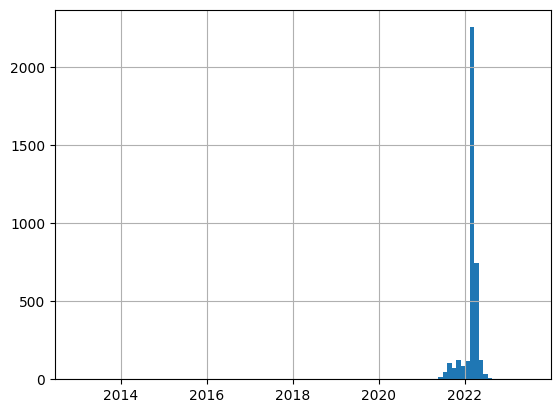

In [275]:
income_data['Publish Date'] = pd.to_datetime(income_data['Publish Date'])

income_data[income_data['Fiscal Year'] == 2021]['Publish Date'].hist(bins=100)

In [276]:
# View the series of company tickers that exist for that fiscal year, and see how long the list is.
(income_data[income_data['Fiscal Year'] == 2021]['Ticker']).unique

<bound method Series.unique of 3           A
10         AA
12        AAC
14       AACI
18       AAGH
         ... 
17713     ZVO
17714    ZVSA
17717      ZY
17721    ZYNE
17726    ZYXI
Name: Ticker, Length: 3754, dtype: object>

It appears as though most reporting is done just after the beginning of the year for these companies. Filter the stock price dataframe for the first of March of that year and make a new dataframe of that data, and out the shape of the new dataframe. and use .head() to see it.

In [277]:
stock_prices_2021 = (stock_prices[stock_prices['Date'] == '2021-03-01'])
print('stock_prices_2021 dataframe shape is: ', stock_prices_2021.shape)
stock_prices_2021.head()

stock_prices_2021 dataframe shape is:  (4330, 10)


,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
644,A,2021-03-01,123.05,125.15,122.88,124.48,121.70,1404367,NaN,3.046975e+08
1883,AA,2021-03-01,25.67,26.38,25.40,25.99,25.30,5560293,NaN,1.862515e+08
3895,AAGH,2021-03-01,0.15,0.20,0.12,0.20,0.20,946622,NaN,2.023602e+10
5134,AAIC,2021-03-01,4.07,4.15,4.03,4.06,4.06,189520,NaN,3.341500e+07
6373,AAL,2021-03-01,21.75,22.29,21.05,21.18,21.18,45406096,NaN,6.396758e+08


The list of tickers in the Income Statement dataframe differs from the share prices dataframe. Since this is real world data, I will cut down the data to make both dataframes correspond so that I can add out the market cap column. 

Use `.isin()` dataframe function to first cut down the share prices dataframe to only contain stocks that are in the Income statement dataframe.

In [278]:

stock_prices_2021 = stock_prices_2021[stock_prices_2021['Ticker'].isin(income_data_2021['Ticker'])]

stock_prices_2021

,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
644,A,2021-03-01,123.05,125.15,122.88,124.48,121.70,1404367,NaN,3.046975e+08
1883,AA,2021-03-01,25.67,26.38,25.40,25.99,25.30,5560293,NaN,1.862515e+08
3895,AAGH,2021-03-01,0.15,0.20,0.12,0.20,0.20,946622,NaN,2.023602e+10
5134,AAIC,2021-03-01,4.07,4.15,4.03,4.06,4.06,189520,NaN,3.341500e+07
6373,AAL,2021-03-01,21.75,22.29,21.05,21.18,21.18,45406096,NaN,6.396758e+08
...,...,...,...,...,...,...,...,...,...,...
5316519,ZUO,2021-03-01,15.31,15.68,15.27,15.50,15.50,1546103,NaN,1.210000e+08
5317276,ZUUS,2021-03-01,1.40,1.40,1.40,1.40,1.40,0,NaN,1.053000e+08
5318972,ZVO,2021-03-01,5.29,5.38,4.95,5.19,5.19,366757,NaN,3.275056e+07
5320734,ZYNE,2021-03-01,4.59,4.80,4.53,4.66,4.66,1832815,NaN,2.997526e+07


In [279]:
# Do the same in the opposite direction. 
income_data_2021 = income_data_2021[income_data_2021['Ticker'].isin(stock_prices_2021['Ticker'])]

income_data_2021

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,1.300000e+07,-7.900000e+07,1360000000,0.000000e+00,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,2.500000e+08,-1.950000e+08,1201628671,-1.128000e+09,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-2.004400e+04,-2.004400e+04,-263604,-5.450000e+03,-2.690540e+05,0.0,-269054,0.0,-269054,-269054
24,AAIC,9076064,USD,2021,FY,2021-12-31,2022-03-10,2023-03-31,3.231200e+07,3.231200e+07,...,-8.835000e+06,-8.835000e+06,5250000,-1.319900e+07,-7.949000e+06,-1566000.0,-9515000,0.0,-9515000,-12431000
29,AAL,68568,USD,2021,FY,2021-12-31,2022-02-22,2024-02-21,6.487660e+08,6.487660e+08,...,-1.489000e+09,-1.782000e+09,-2552101532,4.006000e+09,-2.548000e+09,555000000.0,-1993000000,0.0,-1993000000,-1993000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17701,ZUO,994625,USD,2021,FY,2022-01-31,2022-03-28,2024-03-26,1.242060e+08,1.242060e+08,...,-1.822000e+06,-1.823735e+06,-97998000,0.000000e+00,-9.799800e+07,-1427000.0,-99425000,0.0,-99425000,-99425000
17705,ZUUS,11795314,USD,2021,FY,2021-09-30,2022-05-18,2023-01-13,1.053474e+08,1.053474e+08,...,-2.232000e+03,-2.232000e+03,-360344,0.000000e+00,-3.603440e+05,0.0,-360344,0.0,-360344,-360344
17713,ZVO,901866,USD,2021,FY,2021-12-31,2022-04-15,2022-04-15,3.195900e+07,3.195900e+07,...,1.300000e+05,0.000000e+00,-39837000,-2.641000e+06,-4.247800e+07,129000.0,-42349000,0.0,-42349000,-42349000
17721,ZYNE,901704,USD,2021,FY,2021-12-31,2022-03-01,2023-03-28,4.009213e+07,4.009213e+07,...,-5.386340e+05,2.104700e+04,-37309024,0.000000e+00,-3.730902e+07,0.0,-37309024,0.0,-37309024,-37309024


Lost some rows in the dataframes in keeping only common stock tickers. 

Arranged both income and stock price dataframes alphabetically so the rows correspond.
Creates a new dataframe called `stock_data_2021` as a copy.

Create a market cap column in `stock_data_2021` by multiplying the open price with the number of shares outstanding, used `.values` to do the multiplication.


In [280]:

stock_prices_2021 = stock_prices_2021.sort_values(by=['Ticker'])
income_data_2021 = income_data_2021.sort_values(by=['Ticker'])

# Make the stock_data DataFrame from the Income Data and add a Market Cap series.
stock_data_2021 = income_data_2021
stock_data_2021['Market Cap'] = income_data_2021['Shares (Diluted)'].values * stock_prices_2021['Open'].values


In [281]:
stock_data_2021.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Market Cap
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,-7.900000e+07,1360000000,0.000000e+00,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000,3.777635e+10
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,-1.950000e+08,1201628671,-1.128000e+09,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000,4.765980e+09
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-2.004400e+04,-263604,-5.450000e+03,-2.690540e+05,0.0,-269054,0.0,-269054,-269054,3.065783e+09
24,AAIC,9076064,USD,2021,FY,2021-12-31,2022-03-10,2023-03-31,3.231200e+07,3.231200e+07,...,-8.835000e+06,5250000,-1.319900e+07,-7.949000e+06,-1566000.0,-9515000,0.0,-9515000,-12431000,1.315098e+08
29,AAL,68568,USD,2021,FY,2021-12-31,2022-02-22,2024-02-21,6.487660e+08,6.487660e+08,...,-1.782000e+09,-2552101532,4.006000e+09,-2.548000e+09,555000000.0,-1993000000,0.0,-1993000000,-1993000000,1.411066e+10


Take a look at the distribution of Market Caps in the stock market with a histogram.
use a large number of hisogram bins and a log scale, this will enable you to view the data better.
You will see that there are many at the low end, and very few super large corporations in America


Text(0.5, 1.0, 'USA Corporate Market Cap for 2021 Histogram')

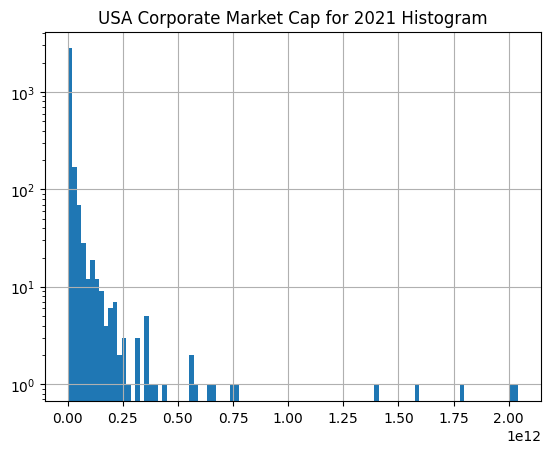

In [282]:

stock_data_2021['Market Cap'].hist(bins=100, log=True)
plt.title('USA Corporate Market Cap for 2021 Histogram')

### Price / Earnings

Using market cap, make a price/earnings Series column in the Stock_Data DataFrame.

- **Price per Share**: The current market price of one share of the company's stock.
- **Earnings per Share (EPS)**: The company's net income divided by the total number of outstanding shares. Essentially, it reflects the company’s profit allocated to each share.

In [283]:
stock_data_2021['Price/Earnings'] = stock_data_2021['Market Cap']/stock_data_2021['Net Income']

In [284]:
stock_data_2021.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,"Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Market Cap,Price/Earnings
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,1360000000,0.000000e+00,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000,3.777635e+10,31.220124
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,1201628671,-1.128000e+09,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000,4.765980e+09,11.109512
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-263604,-5.450000e+03,-2.690540e+05,0.0,-269054,0.0,-269054,-269054,3.065783e+09,-11394.675818
24,AAIC,9076064,USD,2021,FY,2021-12-31,2022-03-10,2023-03-31,3.231200e+07,3.231200e+07,...,5250000,-1.319900e+07,-7.949000e+06,-1566000.0,-9515000,0.0,-9515000,-12431000,1.315098e+08,-13.821318
29,AAL,68568,USD,2021,FY,2021-12-31,2022-02-22,2024-02-21,6.487660e+08,6.487660e+08,...,-2552101532,4.006000e+09,-2.548000e+09,555000000.0,-1993000000,0.0,-1993000000,-1993000000,1.411066e+10,-7.080111


In [285]:
stock_data_2021['Price/Earnings'].replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_2021['Price/Earnings'].dropna()

/var/folders/mh/5w9wsttn3q1586zzyj83m0v40000gn/T/ipykernel_2423/4139328117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data_2021['Price/Earnings'].replace([np.inf, -np.inf], np.nan, inplace=True)


3           31.220124
10          11.109512
18      -11394.675818
24         -13.821318
29          -7.080111
             ...     
17701      -19.125913
17705     -409.293114
17713       -3.992139
17721       -4.932396
17726       31.620933
Name: Price/Earnings, Length: 3168, dtype: float64

Text(0.5, 1.0, 'USA Corporate Price/Earnings for 2021 Histogram')

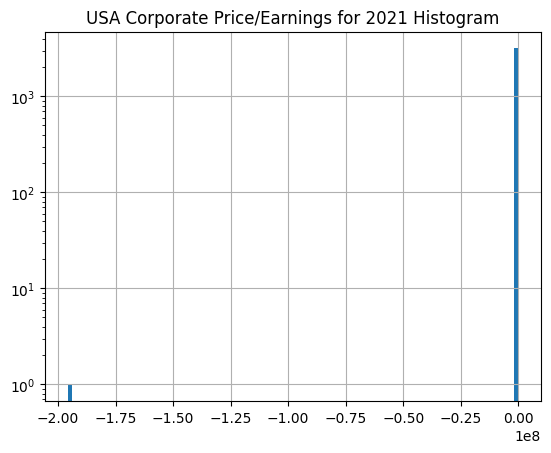

In [286]:

stock_data_2021['Price/Earnings'].hist(bins=100, log=True)
plt.title('USA Corporate Price/Earnings for 2021 Histogram')

### Price / Earnings Ratio Filtered
Filter stock data for a reasonable range of price/earnings ratios of companies to invest in, from 5 to 50, and look at the histogram of the resulting companies. 

#### Key Concepts:

The P/E ratio measures how much investors are willing to pay for each dollar of a company's earnings. A **higher P/E ratio** generally indicates that investors expect higher future earnings growth, while a **lower P/E ratio** may indicate lower growth expectations or that the company is undervalued.

##### Why Filter for P/E Values Between 5 and 50?

Filtering for P/E ratios between 5 and 50 is common in value and growth stock screening, as it targets companies within a reasonable range of valuation, avoiding extremes that may suggest risk or volatility. Here’s why:

1. **Avoiding Very Low P/E Ratios (< 5)**
   - **Low P/E ratios** could indicate that a stock is undervalued. While that might seem attractive, it could also signal underlying issues, such as poor earnings growth, declining profitability, or market pessimism about the company's future.
   - Stocks with P/E ratios below 5 might be in distress or facing significant risks that could lead to further declines. These stocks may appear cheap for good reason (e.g., declining industries, regulatory issues).

 2. **Avoiding Very High P/E Ratios (> 50)**
   - **High P/E ratios** suggest that investors expect significant future earnings growth. However, P/E ratios above 50 are often associated with speculative growth stocks or companies in early stages of development, like tech startups, where future profits are expected but not guaranteed.
   - Stocks with P/E ratios above 50 could be **overvalued**, meaning that the price of the stock has been driven up too high relative to its actual earnings potential, increasing the risk of a price correction.

 3. **Targeting a Balanced Range (5-50)**
   - A **P/E ratio between 5 and 50** typically represents a balance between stocks that are reasonably valued, neither too cheap nor too expensive. This range includes both value stocks (P/E closer to 5) and growth stocks (P/E closer to 50), offering a variety of investment opportunities.
   - This range generally captures companies with stable earnings and moderate growth potential, making it a sweet spot for investors who want a blend of value and growth.

##### Practical Use in Screening
- **P/E < 5**: This range may include highly distressed companies or industries in decline. These stocks might be speculative or risky.
- **P/E > 50**: High-growth companies that are priced based on expectations of future earnings, which can be risky if growth does not materialize.
- **P/E 5-50**: A balance of value and growth opportunities, often seen as safer investments with more predictable performance. Many long-term investors focus on this range for stable companies that provide good returns without excessive risk.

Filter for stocks with a **P/E ratio between 5 and 50**, to target companies that are generally considered to have solid earnings, reasonable valuations, and growth prospects without taking on extreme risk:

Text(0.5, 1.0, '2021 US Corporate Price/Earnings between 5-50 Histogram')

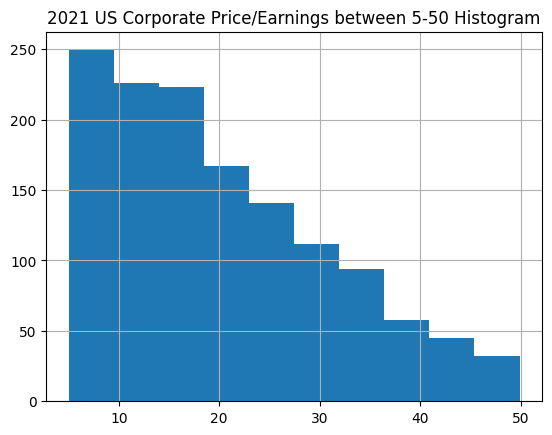

In [287]:
companies_filtered_5_50 = stock_data_2021[((stock_data_2021['Price/Earnings'] >= 5) & (stock_data_2021['Price/Earnings'] <= 50))]['Price/Earnings']
companies_filtered_5_50.hist()
plt.title('2021 US Corporate Price/Earnings between 5-50 Histogram')

Text(0.5, 1.0, '2021 US Corporate Histogram of P/E between 5 and 50')

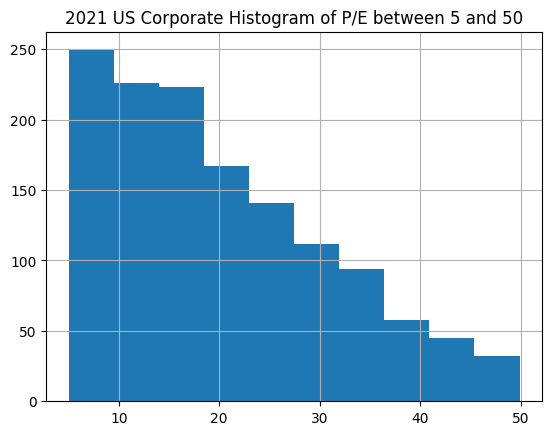

In [288]:
# Make the same histogram as before for p/e but this time after a filter by p/e above 5 and below 50.
stock_data_2021[((stock_data_2021['Price/Earnings'] >= 5) & (stock_data_2021['Price/Earnings'] <= 50))]['Price/Earnings'].hist()
plt.title('2021 US Corporate Histogram of P/E between 5 and 50')

#### Market capitalization with Price/ Earnings

Using **market capitalization (market cap)** in combination with the **Price/Earnings (P/E) ratio** can give investors a more comprehensive view of a company’s valuation, size, and potential for growth or stability. Together, they can help to identify whether a stock is fairly valued, undervalued, or overvalued relative to its peers and the broader market.

##### How to Use Market Cap with P/E Ratio:

1. **Identifying Growth vs. Value Stocks**:
   - **Market cap** tells the size of the company (large-cap, mid-cap, small-cap).
   - **P/E ratio** helps understand the stock’s valuation relative to its earnings.
   
   By combining both, you can distinguish between:
   - **Large-cap, high P/E**: These are often mature companies with stable earnings but high expectations for future growth (think major tech firms like Apple or Google). While they are less risky due to their size, their high P/E might mean they are overvalued or have a lot of growth priced in.
   - **Small-cap, low P/E**: These might be undervalued companies in growth stages or companies that the market is ignoring. They can provide high returns if they realize their potential but carry more risk due to their smaller size.
   - **Large-cap, low P/E**: These companies are often seen as stable, with consistent earnings. If the P/E is low, it could indicate they are undervalued or in a low-growth phase. Value investors often look at this combination as it signals a large, steady company that might be trading at a discount.
   
2. **Assessing Risk and Stability**:
   - **Large-cap, low P/E**: Indicates a stable, possibly undervalued stock that might be appealing to conservative investors. These are typically lower risk, especially during market downturns, because of the company’s size and consistent earnings.
   - **Small-cap, high P/E**: Suggests that investors are expecting significant growth, but there is more risk. High P/E ratios in small-cap companies can indicate speculative or volatile investments.

   **Example**: If looking for low-risk investments, one might favor **large-cap stocks with a low or moderate P/E ratio**. Conversely, if seeking higher returns and can tolerate volatility, **small-cap stocks with a high P/E ratio** might offer growth potential.

3. **Valuation Comparisons**:
   - **Large-cap stocks** with **high P/E ratios** might indicate that the stock is overvalued compared to its earnings. Investors can compare these to other large-cap companies to determine if the market has overvalued a particular company.
   - **Small-cap stocks** with **low P/E ratios** may represent companies that are undervalued, offering a potential bargain if the market has not yet recognized their potential.

   **Example**: By comparing companies within the same sector (e.g., two large-cap tech companies), if one has a significantly lower P/E ratio, it might indicate that it's undervalued compared to its peers. 

4. **Growth vs. Value Screening**:
   - **Growth stocks** often have **higher P/E ratios** because investors expect strong future earnings growth. These are often found in **small- or mid-cap stocks** with a lot of growth potential but higher risk.
   - **Value stocks** typically have **lower P/E ratios**, indicating they might be undervalued relative to their earnings. These are often **large-cap stocks** that are mature and generate steady earnings but may not have strong growth prospects.

   **Example**: Investors screening for **value stocks** may look for **large-cap stocks with low P/E ratios**, indicating companies that are stable but possibly undervalued. Those screening for **growth stocks** might look for **small- or mid-cap stocks with higher P/E ratios**, indicating more speculative growth potential.

5. **Combining for Sector Comparisons**:
   - Within specific sectors, you can use both metrics to assess whether a stock is **fairly priced** compared to others. For example, in the technology sector, large-cap companies like Microsoft might have a high market cap but a moderate P/E ratio. A smaller company with a similar P/E ratio but a lower market cap might signal more room for growth.
   
   **Example**: An investor might filter for companies in a sector by looking at those with market caps within a certain range (e.g., large caps in tech) and compare their P/E ratios. Stocks with a **lower P/E ratio** than sector peers, but similar market cap might be seen as undervalued.



#### Use Case:
 Filtering for companies with a **market cap over $10 billion** (large-cap companies, signaling stability) and **P/E ratios between 10 and 30**. This would screen for **relatively stable and established companies** that aren’t trading at overly speculative valuations, but still have room for growth. It avoids both distressed stocks (low P/E) and overhyped ones (high P/E), giving a balanced view of value:


In [289]:
# Filter the data for market cap over $10 billion and P/E ratio between 10 and 30:
stable_estd_companies_df = stock_data_2021[
    (stock_data_2021['Market Cap'] > 10000000000) & 
    (stock_data_2021['Price/Earnings'] >= 10) & 
    (stock_data_2021['Price/Earnings'] <= 30)
]

# Display the filtered list of tickers from the new dataframe
stable_estd_companies_df["Ticker"].unique()

array(['AAP', 'AAPL', 'ABBV', 'ACN', 'ADM', 'ADP', 'AEE', 'AEP', 'AGR',
       'AJG', 'AKAM', 'AMAT', 'AMCR', 'AME', 'AMGN', 'ANET', 'APD', 'APH',
       'ATO', 'ATUS', 'ATVI', 'AVB', 'AVTR', 'AVY', 'AWK', 'AZO', 'BAH',
       'BBWI', 'BBY', 'BIIB', 'BLK', 'BMY', 'BRO', 'CAG', 'CAH', 'CARR',
       'CAT', 'CBOE', 'CBRE', 'CDW', 'CHD', 'CHKP', 'CHRW', 'CHTR', 'CL',
       'CMCSA', 'CME', 'CMI', 'CMS', 'CNC', 'COR', 'COST', 'CP', 'CPB',
       'CPRT', 'CQP', 'CSCO', 'CSX', 'CTSH', 'CTVA', 'CVS', 'CVX', 'D',
       'DAR', 'DE', 'DG', 'DHI', 'DHR', 'DLTR', 'DOV', 'DPZ', 'DRE',
       'DRI', 'DTE', 'DUK', 'DVA', 'ED', 'EFX', 'EIX', 'EMN', 'EMR',
       'ENB', 'EPD', 'EQR', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD',
       'EXR', 'FAST', 'FBHS', 'FCX', 'FDS', 'FDX', 'FE', 'FLT', 'FMC',
       'FTCH', 'GD', 'GEN', 'GGG', 'GILD', 'GIS', 'GLPI', 'GLW', 'GOOG',
       'GPC', 'GRMN', 'GWW', 'HAL', 'HD', 'HON', 'HRL', 'IBM', 'ICE',
       'INCY', 'INTC', 'IP', 'IPG', 'IRM', 'IT', 'ITW', 'JBHT', 'J

Text(0.5, 1.0, '2021 US Corporate Histogram of P/E with Market Cap')

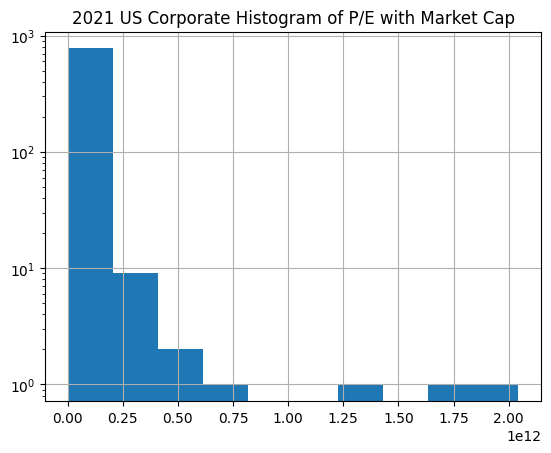

In [290]:
#View a histogram of a different column, say market cap, but with the same p/e filter
stock_data_2021[((stock_data_2021['Price/Earnings'] >= 10) & (stock_data_2021['Price/Earnings'] <= 30))]['Market Cap'].hist(log=True)
plt.title('2021 US Corporate Histogram of P/E with Market Cap')

Text(0.5, 1.0, '2021 US Corporate Plot of P/E with Market Cap')

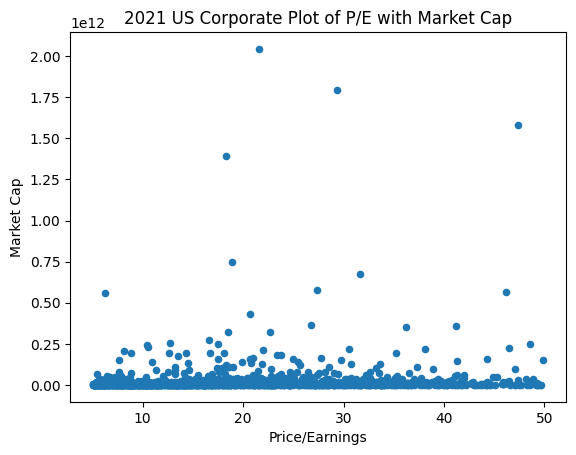

In [291]:
# You can also plot scatter plots with Pandas, here is an example scatter plot of p/e with Market cap.
stock_data_2021[((stock_data_2021['Price/Earnings'] >= 5) & (stock_data_2021['Price/Earnings'] <= 50))].plot.scatter(x = 'Price/Earnings', y = 'Market Cap')
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')
plt.title('2021 US Corporate Plot of P/E with Market Cap')

 It appears as though the largest companies have a P/E around 20-35, for the rest nearly any P/E can be found.

### Gross Profit Margin

**Gross profit margin** plays a significant role in understanding a company's financial health and can complement metrics like **market capitalization**, the **P/E ratio**, and the **operating margin** when evaluating investment opportunities.

#### What is Gross Profit Margin?

Gross profit margin is a key measure of a company's efficiency in producing goods or services relative to its revenue. It indicates how much money a company retains from its sales after deducting the **cost of goods sold (COGS)**, which includes direct production costs like materials and labor.

It shows the percentage of revenue that exceeds the direct costs associated with producing the goods or services the company sells.

#### How Gross Profit Margin Complements Market Cap, P/E Ratio, and Operating Margin:

1. **Indicator of Core Profitability**:
   - A **high gross profit margin** means the company can produce and sell its products at a significant markup over its direct production costs, which suggests efficiency in its core operations.
   - When combined with **market capitalization**, a high gross profit margin indicates that a company is large and can leverage economies of scale while maintaining strong profit margins. This suggests long-term profitability and operational strength.
   - For **small-cap companies**, a high gross profit margin might signal strong potential for growth, as the company has high core profitability that can support future expansion.

   **Example Use**: Investors looking for **stable, established companies** may filter for large-cap stocks with high gross profit margins to ensure that the company can generate reliable core profits. Conversely, small-cap companies with high gross margins might be attractive for **growth investors**.

2. **Relationship with P/E Ratio**:
   - A company with a **high gross profit margin** and a **low P/E ratio** may indicate that it is undervalued. It suggests that the company is efficient in generating profit from its core operations, yet the stock price may not fully reflect this profitability, presenting a potential value investment.
   - On the other hand, a **high P/E ratio** with a **low gross profit margin** could be a warning sign, indicating that investors are paying a premium for a company that struggles to generate profit from its core business.

   **Example Use**: Investors might filter for stocks with a **low P/E ratio** and a **high gross profit margin**, as these stocks could be undervalued compared to their core profitability, making them strong candidates for investment.

3. **Combination with Operating Margin**:
   - While **gross profit margin** measures core profitability before operating expenses, **operating margin** accounts for those expenses, showing a fuller picture of overall operational efficiency.
   - A **high gross profit margin** coupled with a **low operating margin** could indicate that the company is highly profitable in its core operations but faces high operating costs. This could be a sign of inefficiency in management or operating processes.
   - On the other hand, a company with both **high gross profit** and **operating margins** suggests it is highly efficient both in its core operations and in managing its overall expenses, making it an attractive investment candidate.

   **Example Use**: Investors may screen for companies with **high gross and operating margins** to find those that are both operationally efficient and profitable across their entire business.

4. **Industry Comparison**:
   - Gross profit margin can vary widely across industries. Companies in industries with low COGS, like software or services, tend to have higher gross margins than those in industries with high production costs, like manufacturing or retail.
   - Comparing gross profit margin within an industry allows investors to identify companies that are more efficient than their peers at generating profit from core operations.

   **Example Use**: Within a specific industry, a company with a **higher gross profit margin** than its peers might be more competitive and more likely to generate consistent profits, making it a safer investment.

#### Summary:

- **Gross profit margin** provides insight into how efficiently a company generates profit from its core operations. 
- When combined with **market capitalization**, it helps assess whether a large company is leveraging its size for profitability, or if a small-cap company has potential for growth.
- Paired with the **P/E ratio**, it can reveal undervalued companies or flag potential risks with overpriced stocks.
- Together with **operating margin**, it shows a fuller picture of profitability from both core operations and overall business management, highlighting efficient and potentially strong investment opportunities.

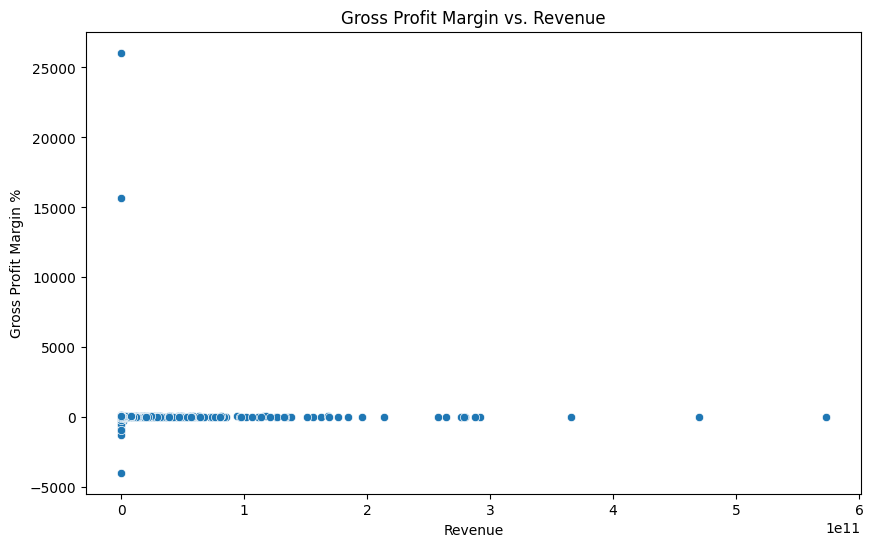

In [292]:
stock_data_2021['Gross Profit Margin'] = stock_data_2021['Gross Profit'] / stock_data_2021['Revenue'] * 100

# Scatter plot of Revenue vs. Gross Profit Margin
plt.figure(figsize=(10,6))
sns.scatterplot(x='Revenue', y='Gross Profit Margin', data=stock_data_2021)
plt.title('Gross Profit Margin vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Gross Profit Margin %')
plt.show()

### Mean Operating Margin

**Mean operating margin** is an important metric that complements **market capitalization** and the **price/earnings (P/E) ratio** by providing insights into a company’s operational efficiency and profitability. It tells how much profit a company makes from its core operations relative to its revenue, after accounting for operating costs such as wages, rent, and raw materials, but before interest and taxes.

#### What is Operating Margin?
It measures the percentage of revenue left after covering operating expenses, showing how well the company is managing its core business operations.


In [293]:
# Group by fiscal year, calculate the mean operating margin:

stock_data_2021['Operating Margin'] = (stock_data_2021['Operating Income (Loss)'] / stock_data_2021['Revenue']) * 100

# Drop any companies that didn't calculate a valid value for the mean operating margin:
stock_data_2021['Operating Margin'].replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_2021.dropna(subset=['Operating Margin'], inplace=True)

/var/folders/mh/5w9wsttn3q1586zzyj83m0v40000gn/T/ipykernel_2423/1488066904.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data_2021['Operating Margin'].replace([np.inf, -np.inf], np.nan, inplace=True)


##### How Does Mean Operating Margin Play Into Market Cap and P/E Ratio?

1. **Indicator of Operational Efficiency**:
   - **High mean operating margin** indicates that a company is efficient at turning revenue into operating profit. This can signal strong management, cost control, and competitive advantage in its industry.
   - When combined with a **large market cap**, a high operating margin suggests that a company is both large and well-managed, making it more stable and reliable for conservative investors.
   - For **small-cap companies**, a high operating margin may signal potential for growth, since they are efficiently managing their operations even as they expand. This combination may make them attractive to investors looking for growth stocks.

   **Example Use**: Investors might screen for large-cap stocks with high operating margins, as these companies are likely stable, profitable, and less risky. On the other hand, a small-cap company with a high operating margin might be a growth stock in disguise.

2. **Relationship with P/E Ratio**:
   - A company with a **high operating margin** and a **low P/E ratio** might be considered undervalued. This could indicate that the company is generating strong profits from its operations but is not being fully recognized by the market in terms of its stock price.
   - Conversely, a **high P/E ratio** combined with a **low operating margin** might be a red flag. It indicates that investors are paying a premium for the stock despite the company struggling to efficiently convert revenue into profit.

   **Example Use**: If two companies have similar market caps, but one has a lower P/E ratio and a higher operating margin, it might be seen as undervalued compared to the other, making it a better investment. Conversely, a high P/E ratio with a low operating margin might suggest overvaluation or inefficiency.

3. **Growth vs. Value**:
   - **Growth investors** might look at **small- to mid-cap companies** with high operating margins as signs of operational efficiency that can drive future earnings growth. These companies could have high P/E ratios, but if they are efficient at turning revenue into profits, the higher valuation might be justified.
   - **Value investors** might focus on **large-cap companies** with **lower P/E ratios** and **higher operating margins**, as this suggests the company is efficiently generating profits but is not overvalued by the market. This could be an attractive opportunity for value investors seeking strong, stable companies at a reasonable price.

   **Example Use**: For growth investing, focus on small-cap companies with high operating margins and higher P/E ratios, indicating growth potential. For value investing, prioritize large-cap companies with lower P/E ratios and high operating margins for stability and potential undervaluation.

4. **Profitability in Various Market Conditions**:
   - Companies with **higher operating margins** tend to have more resilience during economic downturns because they can absorb temporary revenue drops while still maintaining profitability. This makes them less risky investments, particularly in volatile markets.
   - When combined with **market cap**, a high operating margin suggests that a company can continue generating profits despite its size, whereas a small-cap company with a lower operating margin might struggle to survive economic stress.

   **Practical example**: Investors looking for stable, defensive stocks during economic uncertainty might filter for large-cap companies with high operating margins:


In [294]:
#  filter for large-cap companies with high operating margins
# Filter the data for large-cap (market cap over $10 billion), p/e between 10-30 and a high operating margin:
large_cap_high_om_df = stock_data_2021[
    (stock_data_2021['Market Cap'] > 10000000000) & 
    (stock_data_2021['Price/Earnings'] >= 10) & 
    (stock_data_2021['Price/Earnings'] <= 30) &
    (stock_data_2021['Operating Margin'] >= 60)
]

# Display the filtered list of tickers from the new dataframe
large_cap_high_om_df.sort_values(by='Operating Margin', ascending=False).head(10)

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Market Cap,Price/Earnings,Gross Profit Margin,Operating Margin
16568,VICI,1338976,USD,2021,FY,2021-12-31,2022-02-23,2024-02-22,564467362.0,577066292.0,...,1.019214e+09,-2880342.0,1017841000,0.0,1008534000,1008534000,1.683879e+10,16.696308,98.932037,95.872205
4941,DRE,446513,USD,2021,FY,2021-12-31,2022-02-18,2022-02-18,379220000.0,384624000.0,...,8.801670e+08,-18549000.0,861618000,0.0,852895000,852895000,1.524265e+10,17.871660,92.243402,84.048980
6739,GLPI,447206,USD,2021,FY,2021-12-31,2022-02-24,2024-02-27,235267000.0,236153000.0,...,5.624280e+08,-28342000.0,534086000,0.0,534047000,534047000,1.078038e+10,20.186209,92.565551,67.416149
16807,VRSN,378234,USD,2021,FY,2021-12-31,2022-02-18,2024-02-15,111664000.0,111793000.0,...,7.822000e+08,2600000.0,784800000,0.0,784800000,784800000,2.186447e+10,27.859932,85.545345,65.290750


   **Practical example**: On the other hand, small-cap companies with low margins could be riskier but offer greater rewards in times of growth:

In [295]:
# Filter the data for small-cap (market cap under $2 billion), p/e between 10-30 and a low operating margin:
small_cap_high_om_df = stock_data_2021[
    (stock_data_2021['Market Cap'] < 2000000000) & 
    (stock_data_2021['Price/Earnings'] >= 10) & 
    (stock_data_2021['Price/Earnings'] <= 30) &
    (stock_data_2021['Operating Margin'] < 65) &
    (stock_data_2021['Operating Margin'] > 20)
]

# Display the filtered list of tickers from the new dataframe
small_cap_high_om_df.sort_values(by='Operating Margin', ascending=False).head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Market Cap,Price/Earnings,Gross Profit Margin,Operating Margin
11262,NVEC,102816,USD,2021,FY,2022-03-31,2022-05-04,2023-05-03,4830826.0,4830871.0,...,17499813.0,-2992312.0,14507501,0.0,14507501,14507501,3.489338e+08,24.051959,76.792170,60.505811
13148,REPX,10384295,USD,2021,FY,2021-12-31,2021-12-14,2023-03-08,19649000.0,19910000.0,...,27267000.0,-5869000.0,21398000,0.0,21398000,21398000,5.901324e+08,27.578858,0.000000,60.461135
7305,HESM,11794942,USD,2021,FY,2021-12-31,2022-03-01,2024-02-29,25600000.0,25700000.0,...,632400000.0,-14600000.0,617800000,0.0,46400000,46400000,5.494660e+08,11.841940,86.109586,60.408706
10255,MNRL,998444,USD,2021,FY,2021-12-31,2022-02-28,2022-02-28,45198000.0,45888000.0,...,84279000.0,-16253000.0,68026000,0.0,50283000,50283000,6.768480e+08,13.460772,0.000000,59.079998
7633,HTGC,10384205,USD,2021,FY,2021-12-31,2022-02-22,2024-02-15,114742000.0,115955000.0,...,174155000.0,0.0,174155000,0.0,174155000,174155000,1.871514e+09,10.746253,90.856337,58.711556



5. **Industry Comparison**:
   - Operating margin varies across industries. A company with a **high operating margin** relative to others in the same industry is more likely to be efficient and profitable, making it a better investment candidate.
   - Combining **market cap**, **P/E ratio**, and **operating margin** allows investors to compare companies across sectors or within the same sector to see which are more profitable or potentially undervalued.

   **Example Use**: In an industry like technology, where high margins are common, a company with a **low P/E ratio** and **high operating margin** could be a good investment. In contrast, in a low-margin industry like retail, the same combination might indicate a market leader.


##### Practical Examples:

- **High Market Cap + High Operating Margin + Low P/E Ratio**: This indicates a large, established company with efficient operations and undervalued stock. It is likely a value investment with potential for long-term stability.

- **Small Market Cap + High Operating Margin + High P/E Ratio**: This suggests a growing company with efficient operations and high expectations for future growth. It is likely a growth investment with higher risk but potential for significant gains.

### Financial Metrics Heatmap 

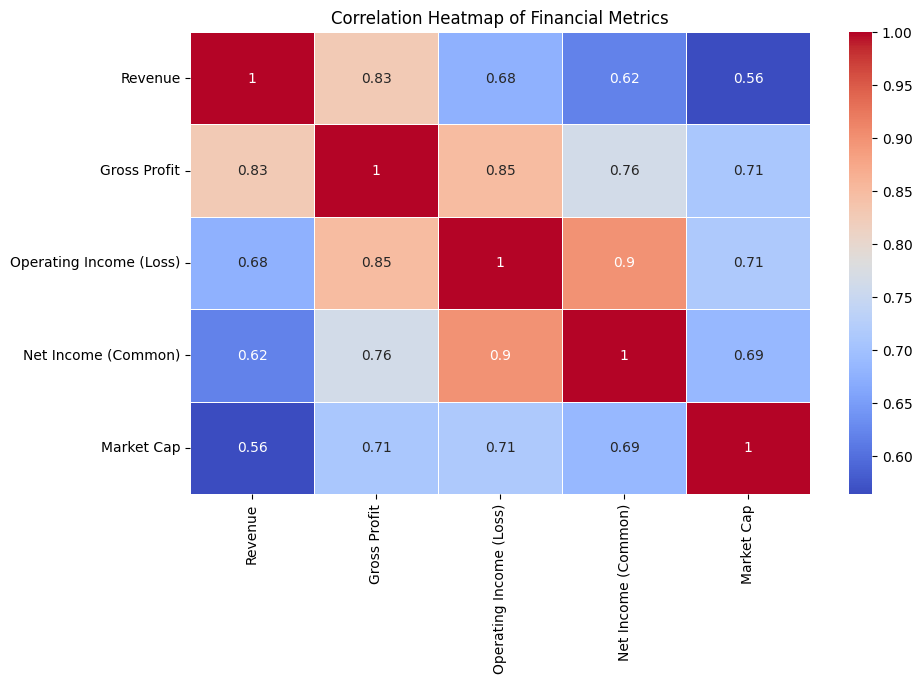

In [296]:
# Select relevant columns for correlation
cols = ['Revenue', 'Gross Profit', 'Operating Income (Loss)', 'Net Income (Common)', 'Market Cap']

# Calculate the correlation matrix
corr_matrix = stock_data_2021[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()


 The financial metrics heatmap revealed a few notable correlations, underscoring the relationships between these key financial figures.

- A strong correlation (0.9) is found between **Net Income (Common)** and **Operating Income (Loss)**.
- A similarly strong correlation (0.85) exists between **Operating Income (Loss)** and **Gross Profit**.
- Finally, a correlation of 0.83 is observed between **Gross Profit** and **Revenue**.

Correlation breakdown:

**Net Income (Common) and Operating Income (Loss) -- 0.9 correlation**
- **Reason**: 
  - **Operating Income** represents the income generated from the core business operations before non-operating items like taxes, interest, or extraordinary items are accounted for.
  - **Net Income (Common)** is the bottom line after all expenses, including operating and non-operating, are deducted.
  - Since **Net Income (Common)** is derived largely from **Operating Income**, a strong correlation between these two is expected. The bulk of the company’s profitability typically stems from operations, which means fluctuations in operating income directly impact net income.

**Operating Income (Loss) and Gross Profit -- 0.85 correlation**
- **Reason**: 
  - **Gross Profit** is calculated as revenue minus the cost of goods sold (COGS), which shows how much the company is earning from its core product or service after production costs.
  - **Operating Income** is the result of gross profit minus operating expenses like wages, rent, and utilities.
  - A strong correlation between **Gross Profit** and **Operating Income** is logical because operating income builds on gross profit. If gross profit increases (due to higher revenue or lower COGS), operating income will likely increase as well, barring any significant changes in operating expenses.

**Gross Profit and Revenue -- 0.83 correlation**
- **Reason**: 
  - **Revenue** is the total income a company earns from sales, while **Gross Profit** is the remaining amount after subtracting the cost of goods sold.
  - Since **Gross Profit** depends directly on revenue (Gross Profit = Revenue - COGS), the two metrics are inherently linked. A higher revenue will usually lead to a higher gross profit unless the cost of goods sold rises disproportionately.
  - The 0.83 correlation reflects this relationship: changes in revenue almost always affect gross profit, though the strength of the correlation may be slightly dampened by variations in COGS.


These high correlations reflect the fact that **Operating Income, Gross Profit, and Net Income** are sequential layers of profitability on a company's income statement, each dependent on the previous one. Since these financial metrics are derived from one another, a strong correlation is natural, and their movements tend to be tightly coupled.

## Export dataframes

[Back to top](#table-of-contents)

Check, filter and edit any data types as needed in order to export dataframes for use. Then export as CSV files.

Make sure that the annual income dataframe with its new features are ready to export. 

In [297]:
stock_data_2021.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Market Cap,Price/Earnings,Gross Profit Margin,Operating Margin
3,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,3.050000e+08,3.070000e+08,...,1.360000e+09,-150000000.0,1210000000,0.0,1210000000,1210000000,3.777635e+10,31.220124,53.916759,21.316664
10,AA,367153,USD,2021,FY,2021-12-31,2022-02-24,2024-02-21,1.856634e+08,1.856634e+08,...,1.199000e+09,-629000000.0,570000000,0.0,429000000,429000000,4.765980e+09,11.109512,24.679065,17.091837
18,AAGH,12444287,USD,2021,FY,2021-06-30,2022-01-21,2022-10-31,2.043855e+10,2.043855e+10,...,-2.690540e+05,0.0,-269054,0.0,-269054,-269054,3.065783e+09,-11394.675818,26.244564,-124.474245
24,AAIC,9076064,USD,2021,FY,2021-12-31,2022-03-10,2023-03-31,3.231200e+07,3.231200e+07,...,-7.949000e+06,-1566000.0,-9515000,0.0,-9515000,-12431000,1.315098e+08,-13.821318,0.000000,54.616309
29,AAL,68568,USD,2021,FY,2021-12-31,2022-02-22,2024-02-21,6.487660e+08,6.487660e+08,...,-2.548000e+09,555000000.0,-1993000000,0.0,-1993000000,-1993000000,1.411066e+10,-7.080111,0.090438,-16.950003


In [135]:
stock_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 3 to 17726
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ticker                                    2927 non-null   object 
 1   SimFinId                                  2927 non-null   int64  
 2   Currency                                  2927 non-null   object 
 3   Fiscal Year                               2927 non-null   int64  
 4   Fiscal Period                             2927 non-null   object 
 5   Report Date                               2927 non-null   object 
 6   Publish Date                              2927 non-null   object 
 7   Restated Date                             2927 non-null   object 
 8   Shares (Basic)                            2927 non-null   float64
 9   Shares (Diluted)                          2927 non-null   float64
 10  Revenue                                 

Create a new filtered dataframe of stock prices for 2021 only.

In [298]:
# Convert the 'Date' column to datetime objects
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

# Filter for the year 2022
stock_prices_all_2021 = stock_prices[stock_prices['Date'].dt.year == 2021]

In [299]:
stock_prices_all_2021.shape
stock_prices_all_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132073 entries, 606 to 5322186
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Ticker              1132073 non-null  object        
 1   Date                1132073 non-null  datetime64[ns]
 2   Open                1132073 non-null  float64       
 3   High                1132073 non-null  float64       
 4   Low                 1132073 non-null  float64       
 5   Close               1132073 non-null  float64       
 6   Adj. Close          1132073 non-null  float64       
 7   Volume              1132073 non-null  int64         
 8   Dividend            6786 non-null     float64       
 9   Shares Outstanding  1039176 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 95.0+ MB


Convert Date column back to object

In [300]:
def convert_datetime(dt):
    return datetime.strftime(dt, '%Y-%m-%d') # Change it back to the original format it came in

stock_prices_all_2021['Date']= stock_prices_all_2021['Date'].apply(convert_datetime)

/var/folders/mh/5w9wsttn3q1586zzyj83m0v40000gn/T/ipykernel_2423/1558695331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices_all_2021['Date']= stock_prices_all_2021['Date'].apply(convert_datetime)


In [301]:
stock_prices_all_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132073 entries, 606 to 5322186
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Ticker              1132073 non-null  object 
 1   Date                1132073 non-null  object 
 2   Open                1132073 non-null  float64
 3   High                1132073 non-null  float64
 4   Low                 1132073 non-null  float64
 5   Close               1132073 non-null  float64
 6   Adj. Close          1132073 non-null  float64
 7   Volume              1132073 non-null  int64  
 8   Dividend            6786 non-null     float64
 9   Shares Outstanding  1039176 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 95.0+ MB


Only include stock prices that exist in the stock_data dataframe:

In [302]:
stock_prices_all_2021 = stock_prices_all_2021[stock_prices_all_2021['Ticker'].isin(stock_data_2021['Ticker'])]

In [303]:
stock_prices_all_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736023 entries, 606 to 5322186
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Ticker              736023 non-null  object 
 1   Date                736023 non-null  object 
 2   Open                736023 non-null  float64
 3   High                736023 non-null  float64
 4   Low                 736023 non-null  float64
 5   Close               736023 non-null  float64
 6   Adj. Close          736023 non-null  float64
 7   Volume              736023 non-null  int64  
 8   Dividend            4288 non-null    float64
 9   Shares Outstanding  713639 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 61.8+ MB


Only include company tickers that exist in the stock_data dataframe:

In [304]:
companies = companies[companies['Ticker'].isin(stock_data_2021['Ticker'])]

In [305]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 26 to 5584
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         2927 non-null   object 
 1   SimFinId                       2927 non-null   int64  
 2   Company Name                   2927 non-null   object 
 3   IndustryId                     2927 non-null   Int64  
 4   ISIN                           2888 non-null   object 
 5   End of financial year (month)  2927 non-null   float64
 6   Number Employees               2891 non-null   float64
 7   Business Summary               2923 non-null   object 
 8   Market                         2927 non-null   object 
 9   CIK                            2927 non-null   float64
 10  Main Currency                  2927 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(6)
memory usage: 277.3+ KB


In [306]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IndustryId  75 non-null     int64 
 1   Industry    75 non-null     object
 2   Sector      75 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [307]:
industries.tail()

,IndustryId,Industry,Sector
70,110005,Building Materials,Basic Materials
71,110006,Coal,Basic Materials
72,110007,Steel,Basic Materials
73,111001,Diversified Holdings,Other
74,999999,Not Available,Unknown


Convert dataframes to CSV files, excluding indices, to be used in Tableau visualizations.

In [308]:
# Convert the editted dataframes into a CSV files
stock_data_2021.to_csv('US_Annual_Income_2022.csv', index=False)

In [309]:
stock_prices_all_2021.to_csv('US_Stock_Prices_2022.csv', index=False)

In [310]:
companies.to_csv('US_Companies_2022.csv', index=False)

In [311]:
industries.to_csv('US_Industries.csv', index=False)

## Conclusion

[Back to top](#table-of-contents)

The analysis carried out in this notebook provides a foundational exploration of key financial metrics for 2021 stock evaluation and prepare for the development of an Investor AI. 

Beginning with data import and cleaning, the process ensures the dataset is prepared for accurate analysis. 

Basic stock statistics, such as market capitalization and price-to-earnings ratio, are examined to offer insights into the relative size and valuation of companies. 

Additionally, stock screening based on gross profit margin and operating margin highlights fundamental performance indicators. A financial metrics heatmap further illustrates the relationships between these variables.

The resulting annual income dataframe, now has 4 calculated columns including 'Market Cap', 'Price/Earnings', 'Gross Profit Margin', and 'Operating Margin'. 

The company and stock prices datasets have been cleaned, editted where needed and filtered for use.

These cleaned and processed datasets will serve as the basis for advanced visualizations in Tableau, where deeper insights into stock performance can be uncovered. 

The  extended annual income, cleaned share price and company dataframes were exported as CSV files for future analysis and visualization in Tableau, enabling a more comprehensive evaluation of potential value stocks.